# Plot Query Mappings to Reference Sequence

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pysam

In [28]:
def supp_query_list(sam_file):
    supplementary = []
    with pysam.AlignmentFile(sam_file) as af:
        for read in af:
            if read.is_supplementary:
                supplementary.append(read.query_name)
    return np.unique(supplementary)

In [29]:
def select_queries_in_range(query_list, df, lower, upper):
    p = df[(df["type"] == "primary")]
    p_in_range = p[(p["ref_start"] > lower) & (p["ref_start"] < upper)]
    return p_in_range["query_name"]

In [30]:
def plot_query_to_ref(df, query_name):
    query_df = df[df["query_name"] == query_name]
    query_shift = np.min(query_df["ref_start"])
    for row in query_df.itertuples():
        color = np.random.rand(1,3)
        style = "-" if row.is_forward else ":"
        plt.plot([row.query_start + query_shift, row.ref_start],[1,0],c=color,ls=style)
        plt.plot([row.query_end + query_shift, row.ref_end],[1,0],c=color,ls=style)
    plt.plot([query_shift,query_shift + query_df["query_length"].iloc[0]],[1,1],c="k",lw=5)
    #plt.plot([3.95e6, 4.05e6],[0,0],c="k",lw=5)
    #plt.axvline(3.983e6)
    plt.title(s)
    plt.ylabel("reference - query")
    plt.show()

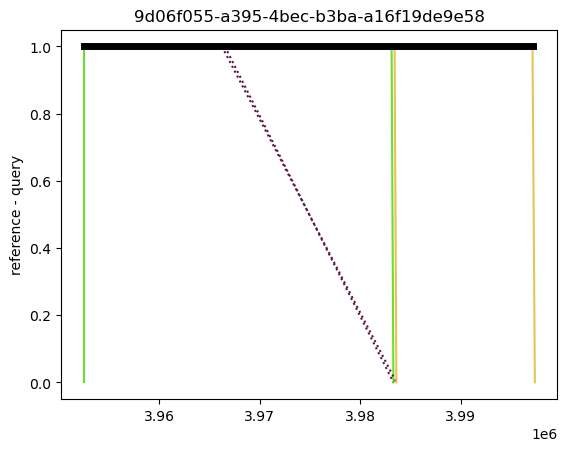

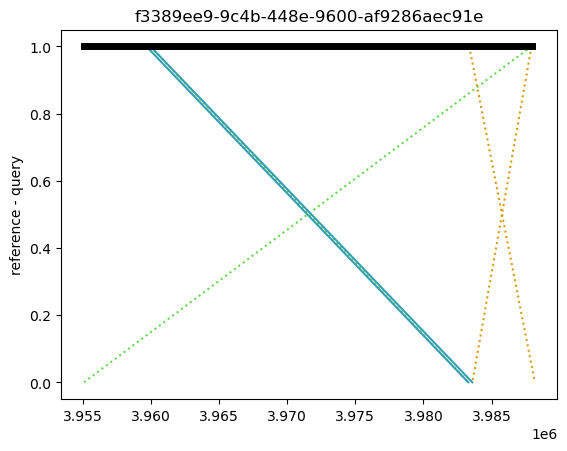

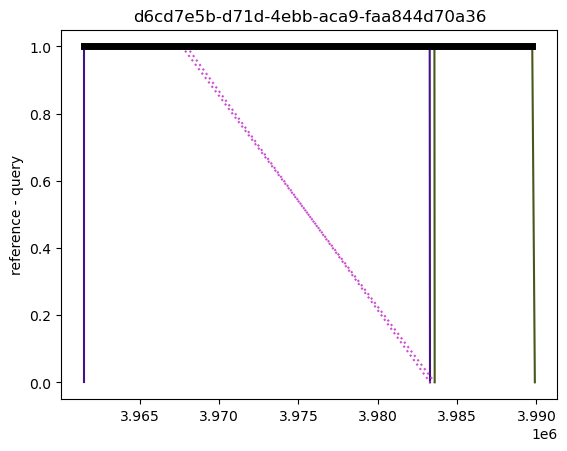

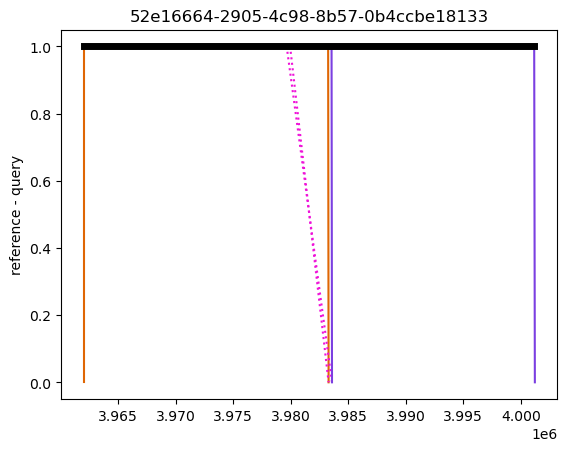

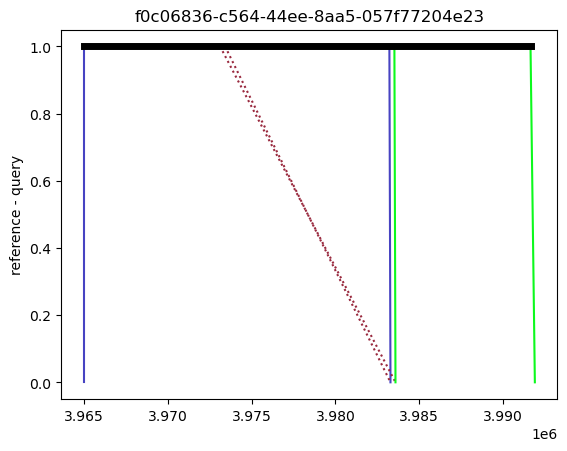

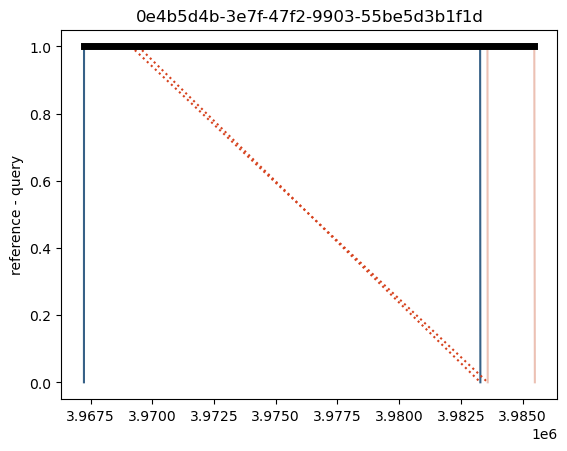

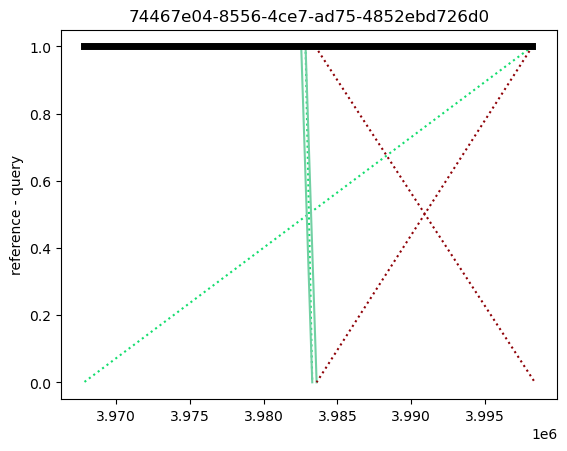

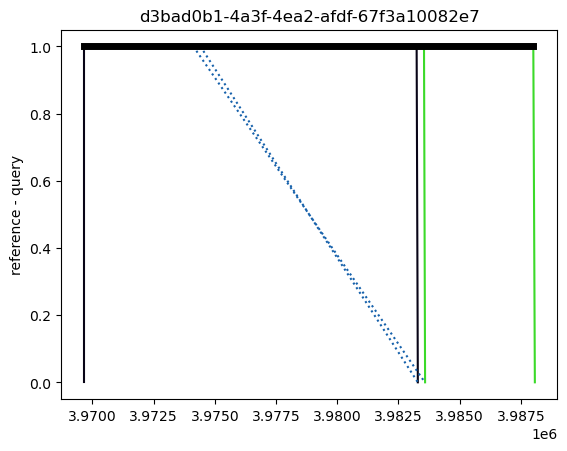

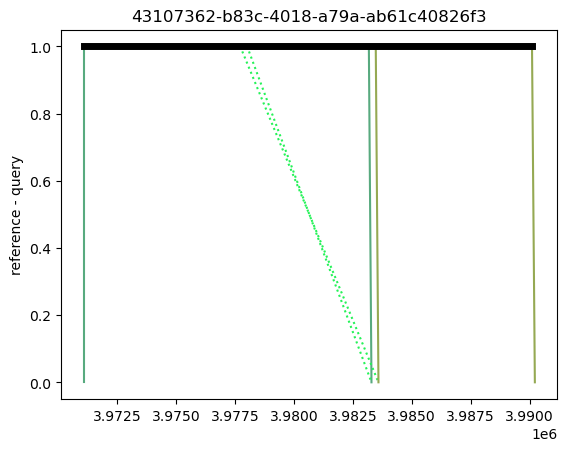

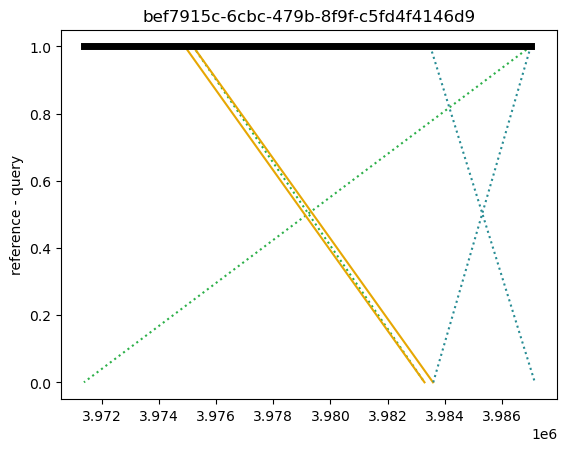

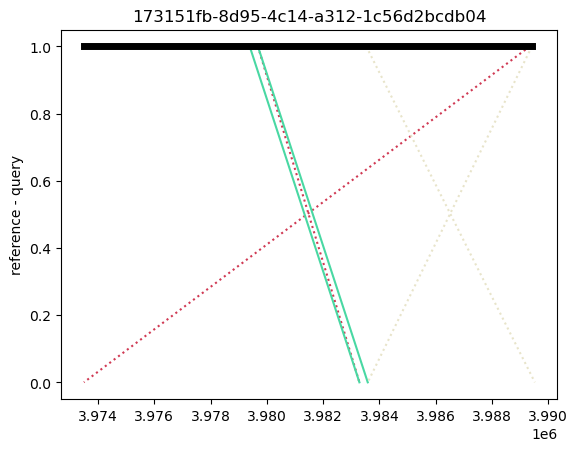

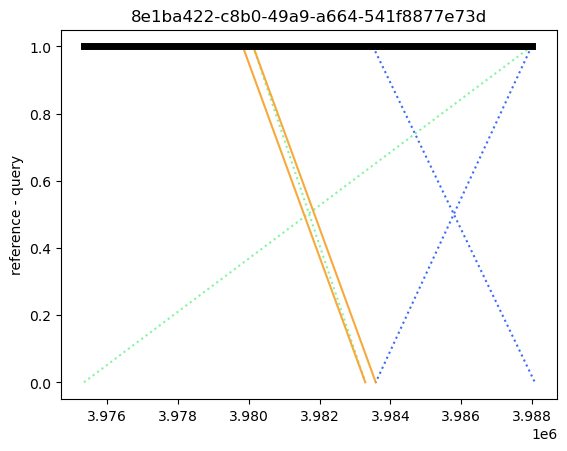

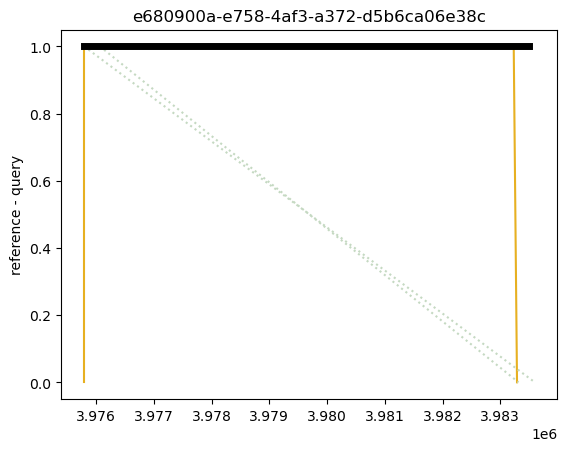

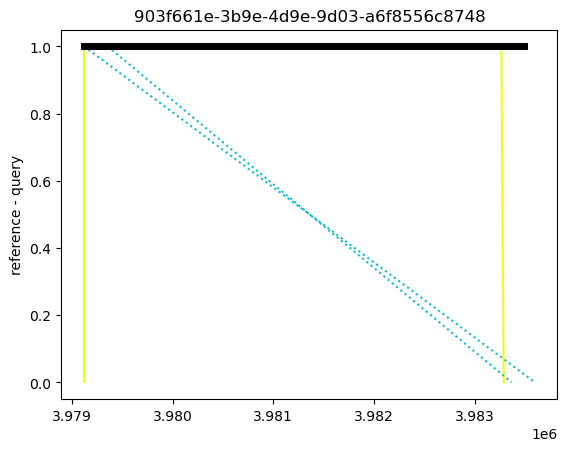

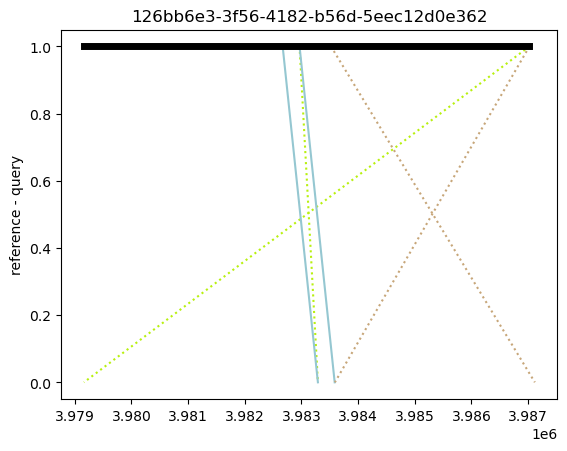

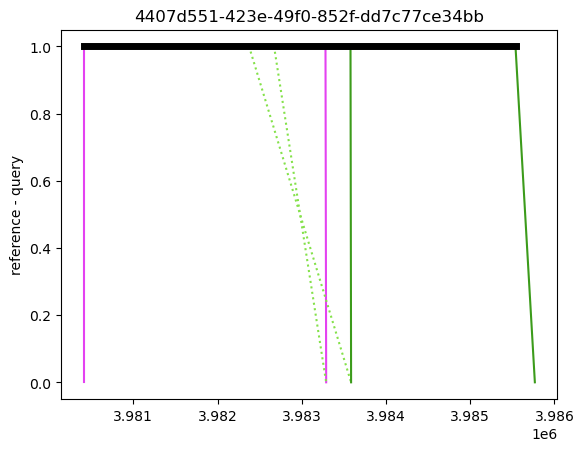

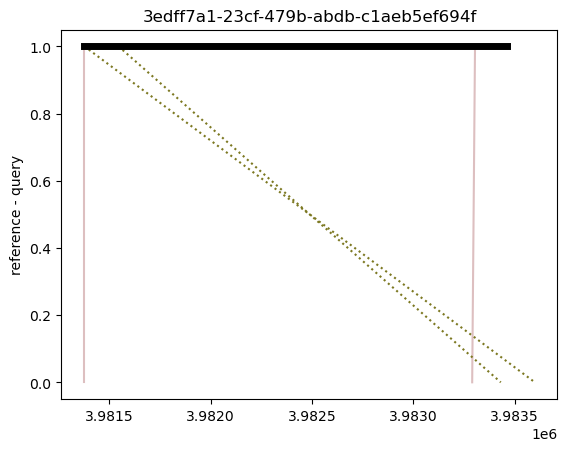

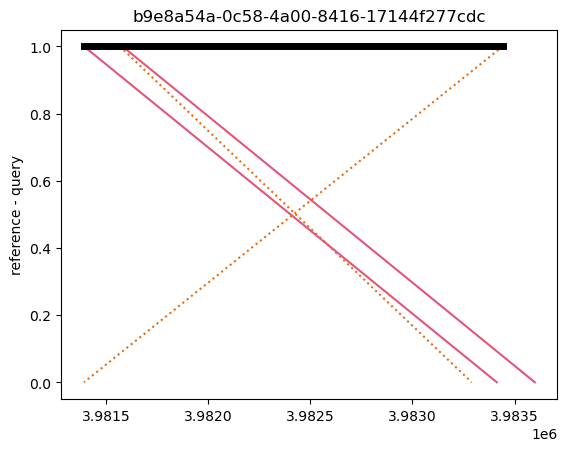

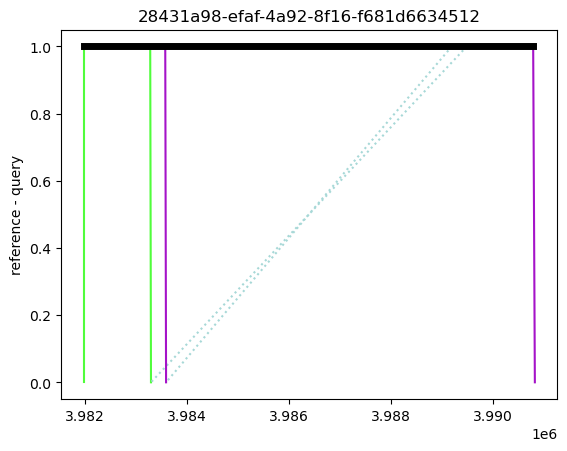

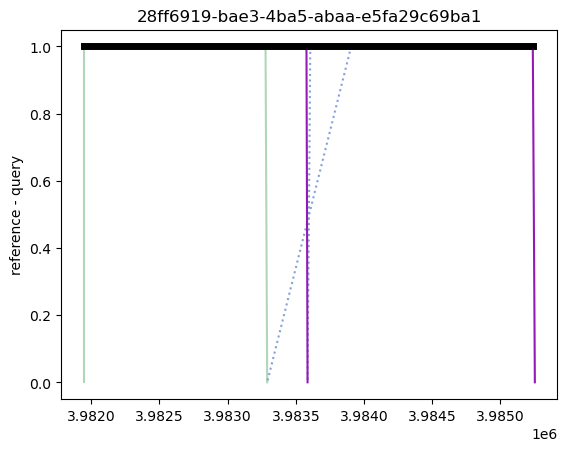

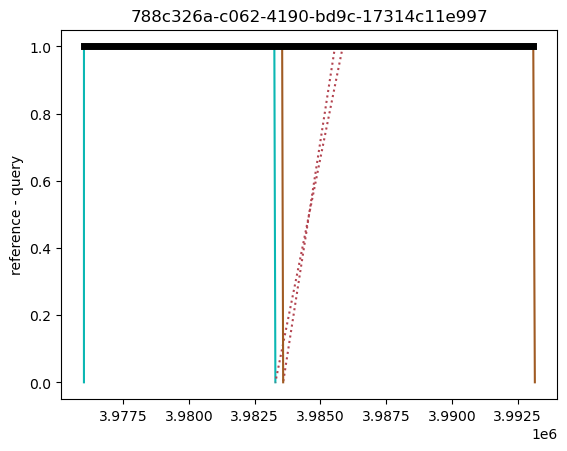

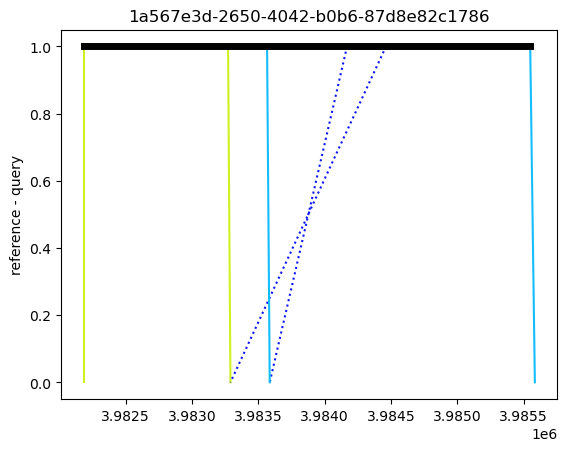

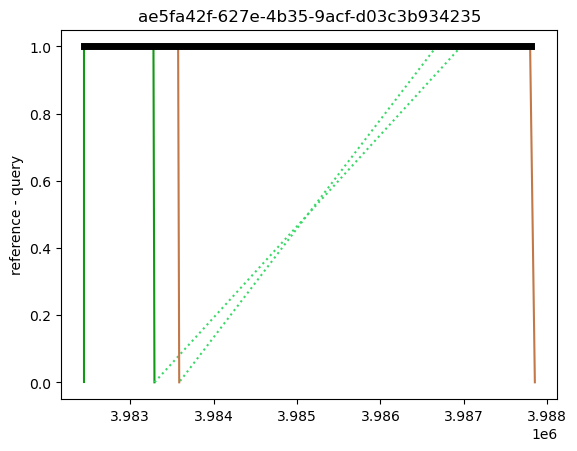

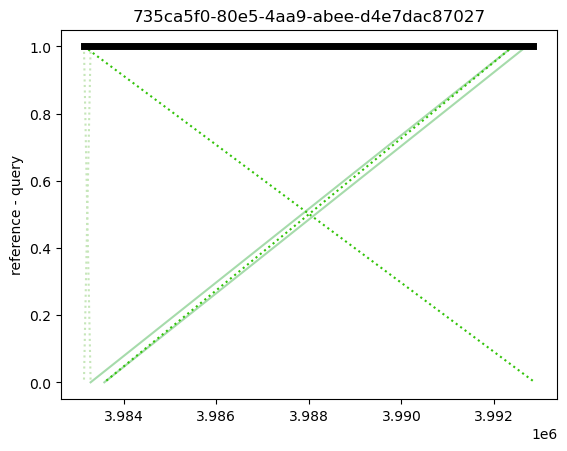

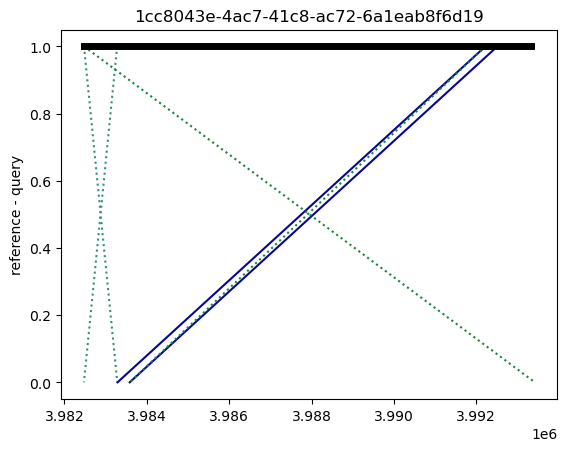

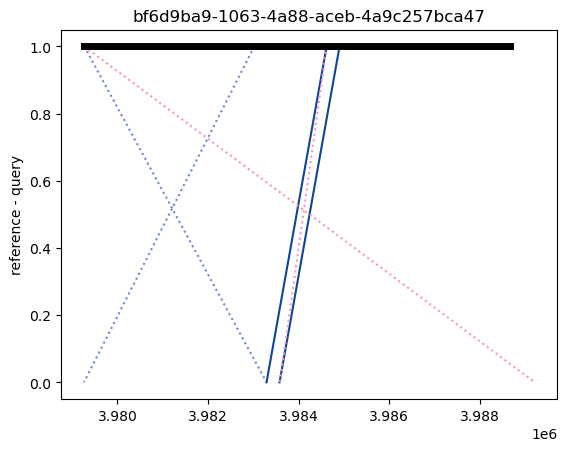

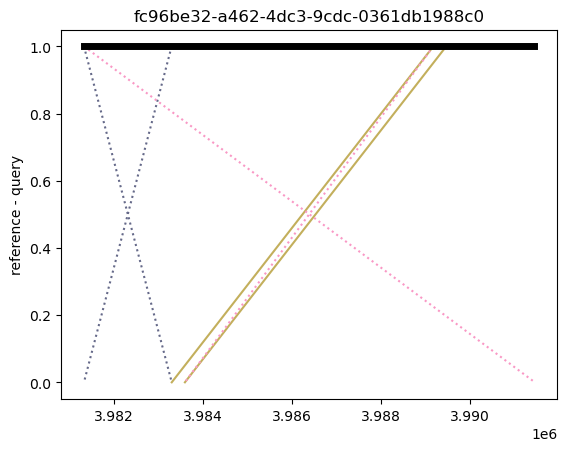

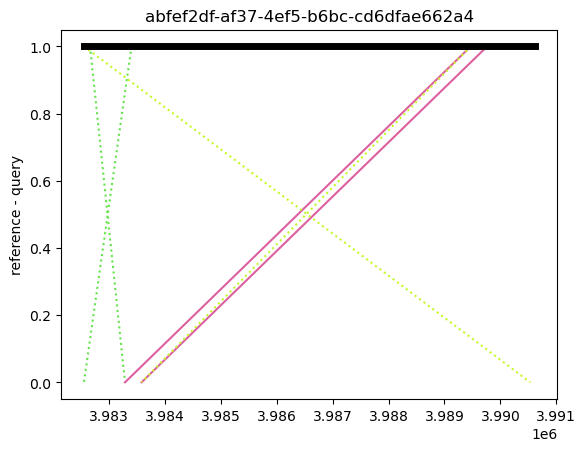

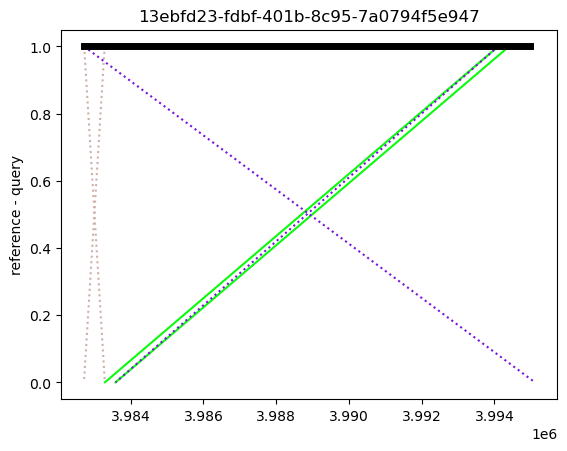

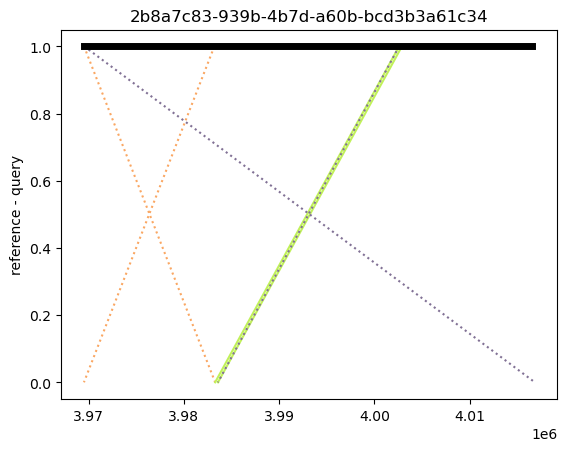

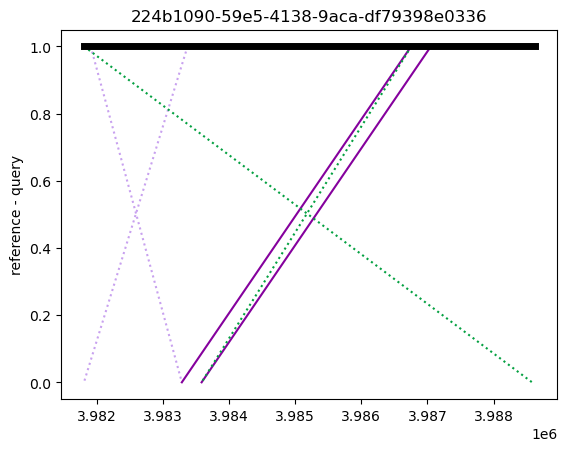

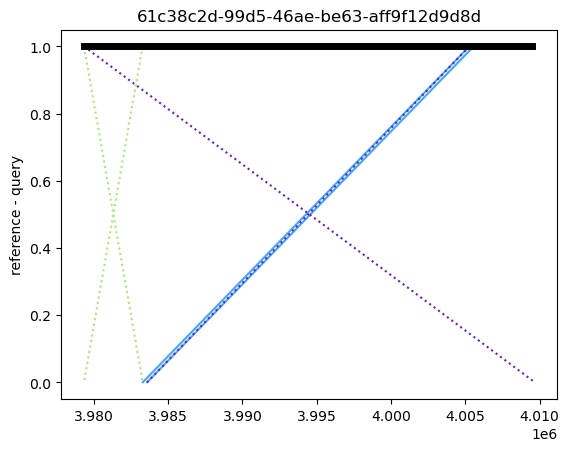

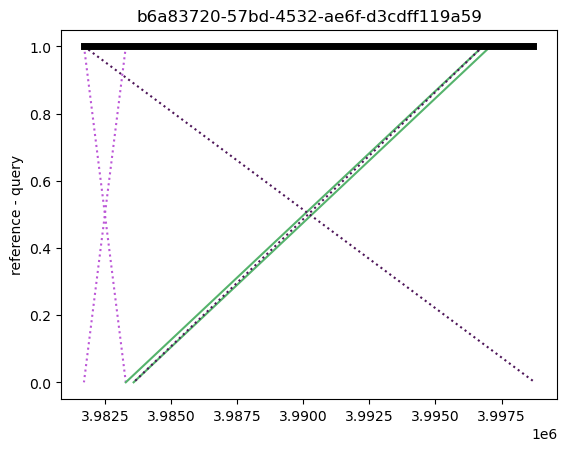

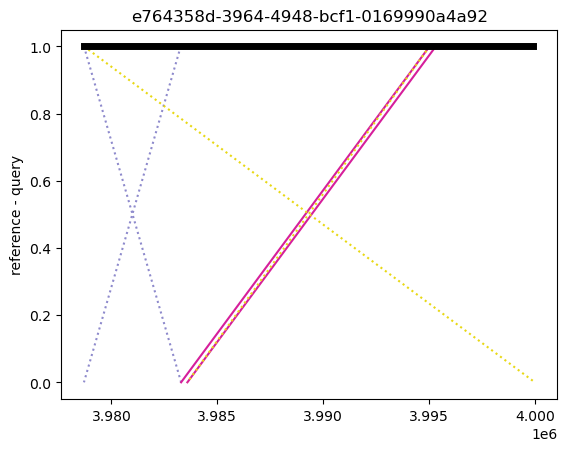

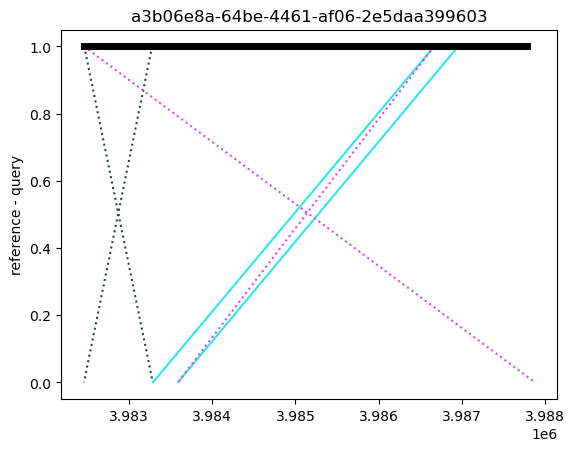

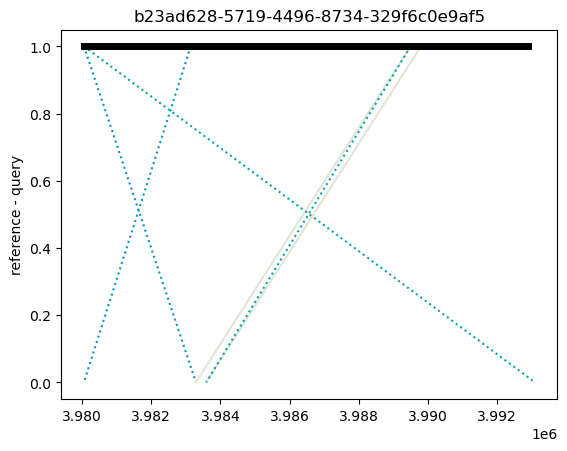

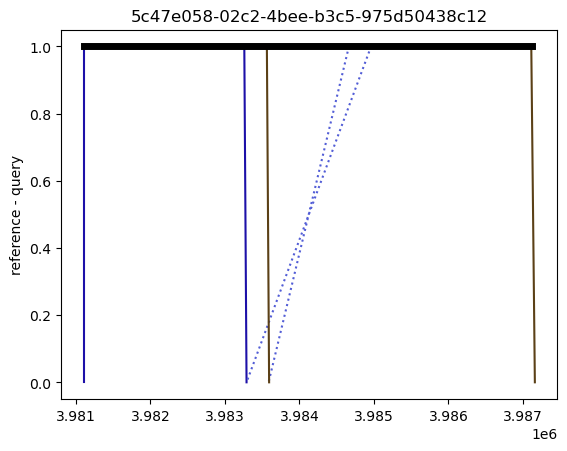

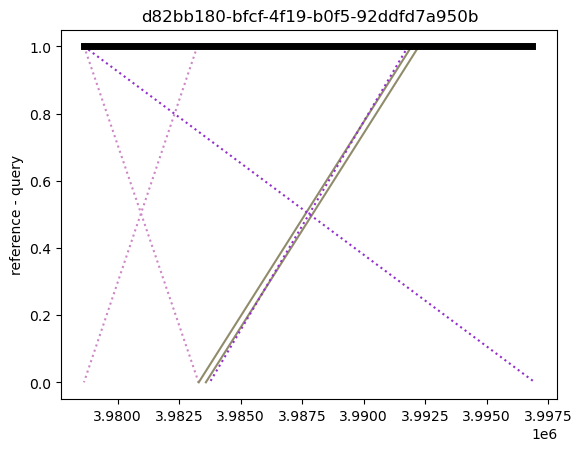

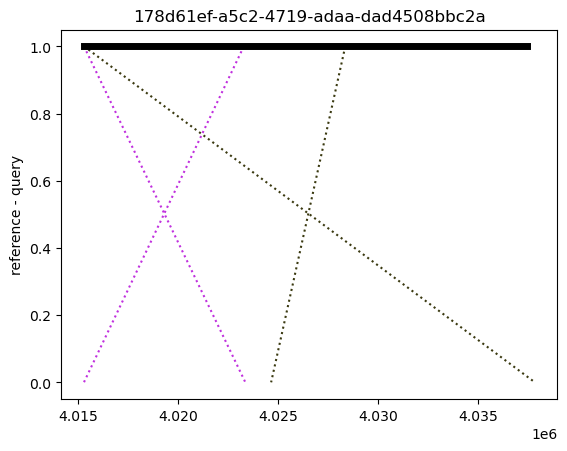

In [32]:
csv_file = "../results/suppl_reads_info.csv"
sam_file = "../results/reads.sorted.bam"
lower_ref = 3.95e6 #2.6e6
upper_ref = 4.05e6 #2.8e6

csv_input = pd.read_csv(csv_file)
df = csv_input #[((csv_input["type"] == "primary") | (csv_input["type"] == "supplementary"))]
df.sort_values(by="alignment_length",ascending=False)
supplementary = supp_query_list(sam_file)
queries_in_range = select_queries_in_range(supplementary, df, lower_ref, upper_ref)
for s in queries_in_range:
    plot_query_to_ref(df, s)